### Aula 02 - Realce de Imagens utilizando operações por pixel

In [72]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# para mostrar como podemos transformar valores de pixels 'r' em uma outra faixa de valores, 
# vamos criar um vetor contendo os 256 possíveis tons de cinza

r = np.arange(256)


`np.arange` permite criar arrays com sequências de valores.

No exemplo acima, `np.arange(256)` gera um array com 256 valores, començando do 0, e portanto gerando um vetor com valores `0, 1, 2, 3, ..., 255`

Podemos utilizar mais opções, no formato: `np.arange(start, end, step)`. Nesse caso a função retorna um array que inicia no valor `start`, com incremento `step` e com o último valor sendo menor do que `end`. Exemplo: `np.arange(1, 2, 0.25)` gera um array `[1, 1.25, 1.50, 1.75]`


### Operações por pixel
As operações por pixel transformam o **valor** *r* de um pixel de entrada em um novo valor *s* por meio de uma transformação de valores na faixa 0 a 255, em outros valores nessa mesma faixa. Ou seja:

$$s = T(r)$$

Por exemplo, a transformação identidade é relativa a copiar os valores, sem transformá-los, e seria dada por:

$$s = T(r) = r$$

A inversão, ou negativo seria dada por:

$$s = T(r) = 255-r$$


In [74]:
s_identidade = r
s_inversao = 255-r


Podemos visualizar essas transformações por meio de funções traçadas num gráfico em que o eixo *r* indica o valor de entrada e um segundo eixo indica o valor resultante. Por exemplo, a inversão:

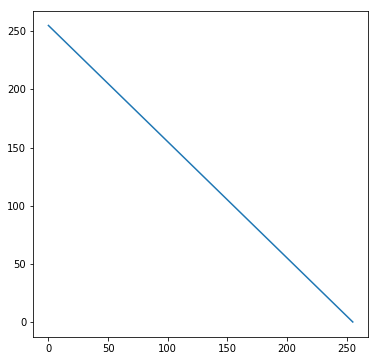

In [75]:
plt.figure(figsize=(6,6)) # deixa o aspecto da figura com o mesma altura e largura (6,6)
plt.plot(r, s_inversao) # plota a transformacao da inversao
plt.show() # exibe o grafico


Vamos agora carregar uma imagem e realizar a inversão.

In [76]:
img1 = imageio.imread("imagens/quote2.png")
img2 = imageio.imread("imagens/scarlett.jpg")

img1_inversao = 255-img1
img2_inversao = 255-img2

(-0.5, 639.5, 399.5, -0.5)

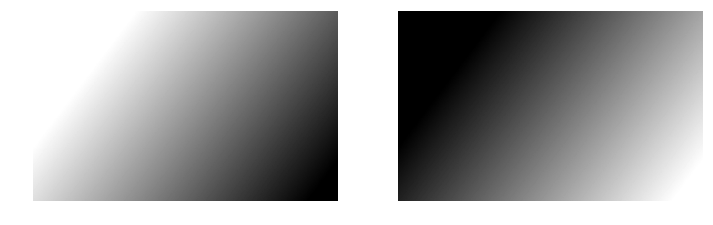

In [77]:
plt.figure(figsize=(12,12)) 
 
# define um painel para exibicao 121: de 1 linha, 2 colunas, 
# e no qual a proxima imagem sera exibida na posicao 1
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off') # remove os eixos com os numeros

plt.subplot(122) # idem acima, mas a proxima imagem sera exibida na posicao 2
plt.imshow(img1_inversao, cmap="gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

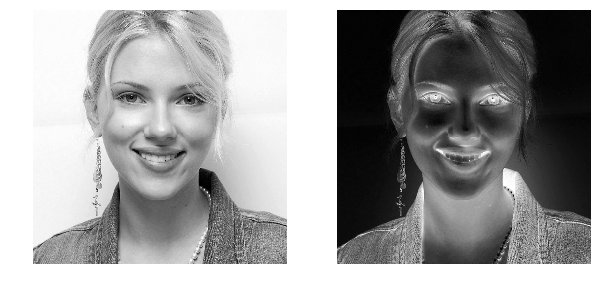

In [78]:
plt.figure(figsize=(10,10)) 
 
# define um painel para exibicao 121: de 1 linha, 2 colunas, 
# e no qual a proxima imagem sera exibida na posicao 1
plt.subplot(121)
plt.imshow(img2, cmap="gray")
plt.axis('off') # remove os eixos com os numeros

plt.subplot(122) # idem acima, mas a proxima imagem sera exibida na posicao 2
plt.imshow(img2_inversao, cmap="gray")
plt.axis('off')

### Operacao de Realce Logarítmica

Funções matemáticas são comumente empregadas para realçar imagens. O logaritmo diminui o intervalo dinâmico entre os tons de cinza, equilibrando a distribuição e comumente melhorando o contraste da imagem, produzindo uma imagem com maior brilho / intensidade de luz.
No entanto precisamos encontrar uma transformação que mapeie valores entre 0-255 para valores entre 0-255. Se aplicarmos o log diretamente, por exemplo, na base 2:
$$s = \log_2(r)$$
Assumindo r = 128, teremos:
$$s = \log_2(128) = 7$$
O que é um valor muito baixo. Assim, temos que, de alguma forma, encontrar uma transformação logaritmica escalada. Faremos isso por meio de um fator de correção

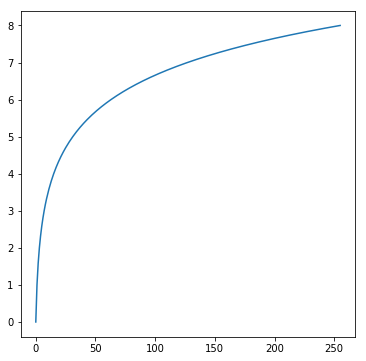

In [79]:
r_log2 = np.log2(r + 1) # somamos 1 para evitar log(0)
plt.figure(figsize=(6,6)) 
plt.plot(r, r_log2)
plt.show()

Note que os valores [0-255) são mapeados para [0,8)
Assim, iremos reescalar usando o valor máximo dividido pelo log computado no valor máximo: $$c = 255 / \log_2(1+255)$$

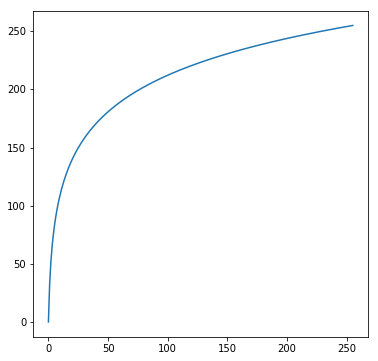

In [80]:
c_scale = 255 / (np.log2(1+255))
r_log2 = c_scale * np.log2(r + 1)
plt.figure(figsize=(6,6)) 
plt.plot(r, r_log2)
plt.show()

Agora aplicaremos em uma imagem:

In [81]:
img3 = imageio.imread("imagens/nap.jpg")

img3_log2 = (c_scale * np.log2(1 + img3)).astype(np.uint8)

(-0.5, 660.5, 660.5, -0.5)

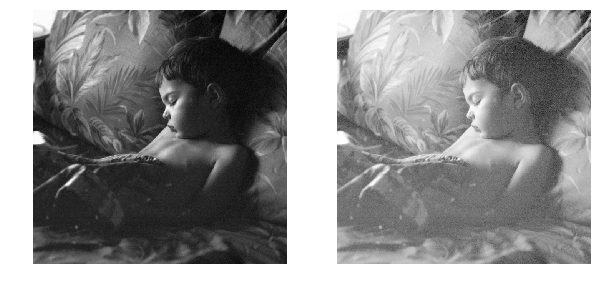

In [82]:
plt.figure(figsize=(10,10)) 
 
# define um painel para exibicao 121: de 1 linha, 2 colunas, 
# e no qual a proxima imagem sera exibida na posicao 1
plt.subplot(121)
plt.imshow(img3, cmap="gray")
plt.axis('off') # remove os eixos com os numeros

plt.subplot(122) # idem acima, mas a proxima imagem sera exibida na posicao 2
plt.imshow(img3_log2, cmap="gray")
plt.axis('off')

Inspecionando o gráfico que representa a transformação, veremos que pixels de valores mais baixos (escuros) são mapeados em valores mais altos (mais claros). Ex. o valor 30 é mapeado em 160 (ver figura abaixo)

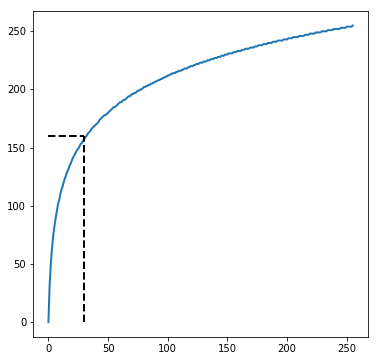

In [83]:
c_scale = 255 / (np.log2(1+255))
r_log2 = (c_scale * np.log2(r + 1)).astype(np.uint8)
plt.figure(figsize=(6,6)) 
plt.plot(r, r_log2, lw=2)

plt.plot([30, 30], [0, 160], 'k--', lw=2) # exibe reta
plt.plot([0, 30], [160, 160], 'k--', lw=2)# exibe reta
plt.show()

### Outras transformações
Além da transformação logarítmica, podemos utilizar a operação Gamma, Thresholding, além de operações bit-a-bit, conforme exemplificado abaixo


#### Thresholding
Encontra uma imagem limiarizada (binária) cortando os tons de cinza acima de um determinado valor


In [84]:
L = 100 #limiar
indL = np.where(img1 > L)  # retorna os indices nos quais a imagem img1 possui valor superior a L

img1_thresh = np.zeros(img1.shape)  # cria um array preenchido com valores '0', do mesmo tamanho (shape) de img1

img1_thresh[indL] = 1 # atribui 1 aos indices encontrados

(-0.5, 639.5, 399.5, -0.5)

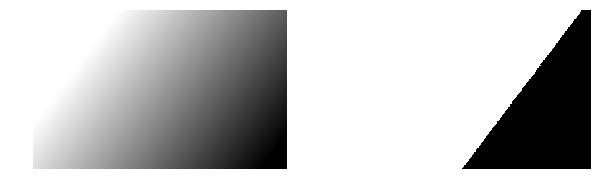

In [85]:
plt.figure(figsize=(10,10)) 
 
# define um painel para exibicao 121: de 1 linha, 2 colunas, 
# e no qual a proxima imagem sera exibida na posicao 1
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off') # remove os eixos com os numeros

plt.subplot(122) # idem acima, mas a proxima imagem sera exibida na posicao 2
plt.imshow(img1_thresh, cmap="gray")
plt.axis('off')

#### Gamma
Ajusta os tons de cinza por meio da potência. 
$$s = T(r) = r^\gamma$$

Novamente, note que é preciso reescalar (assim como feito na operação logarítmica).
Abaixo mostramos diversas transformações produzidas pela função de ajuste Gamma


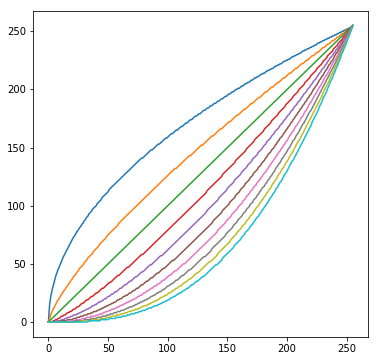

In [86]:
R = 255.0 # maior valor possivel em tons de cinza

plt.figure(figsize=(6,6))
# vamos explorar diferentes valores de gamma, entre 0.5 e 2.75, com passo 0.25
for gamma in np.arange(0.5, 3.0, 0.25):
    r_gamma = (R * np.power( r / R , gamma)).astype(np.uint8)
    plt.plot(r, r_gamma)

plt.show()

#### Fatiamento por bits
Podemos observar os diferentes bits que compoem os tons de cinza da imagem (individualmente), o que poderá oferecer informações importantes para melhor entender os dados

(-0.5, 511.5, 511.5, -0.5)

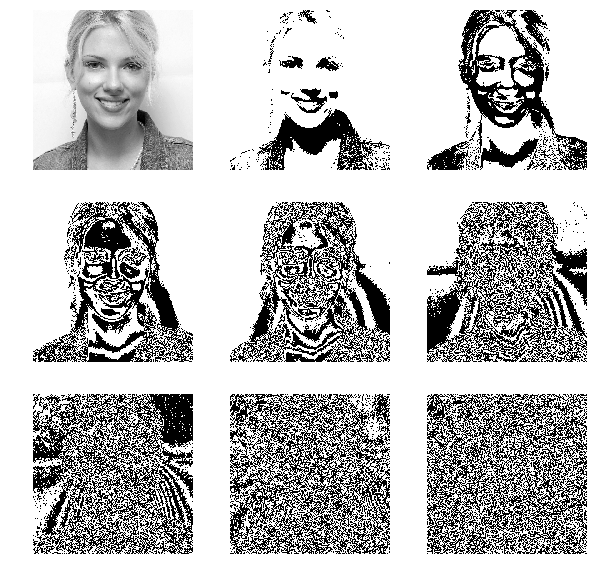

In [88]:
plt.figure(figsize=(10,10))

## operacao bit-a-bit AND com mascara definida pelos bits abaixo
img2_b1 = img2 & 0b10000000
img2_b2 = img2 & 0b01000000
img2_b3 = img2 & 0b00100000
img2_b4 = img2 & 0b00010000
img2_b5 = img2 & 0b00001000
img2_b6 = img2 & 0b00000100
img2_b7 = img2 & 0b00000010
img2_b8 = img2 & 0b00000001

plt.subplot(331)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.subplot(332)
plt.imshow(img2_b1, cmap='gray')
plt.axis('off')
plt.subplot(333)
plt.imshow(img2_b2, cmap='gray')
plt.axis('off')
plt.subplot(334)
plt.imshow(img2_b3, cmap='gray')
plt.axis('off')
plt.subplot(335)
plt.imshow(img2_b4, cmap='gray')
plt.axis('off')
plt.subplot(336)
plt.imshow(img2_b5, cmap='gray')
plt.axis('off')
plt.subplot(337)
plt.imshow(img2_b6, cmap='gray')
plt.axis('off')
plt.subplot(338)
plt.imshow(img2_b7, cmap='gray')
plt.axis('off')
plt.subplot(339)
plt.imshow(img2_b8, cmap='gray')
plt.axis('off')
